## **Exploratory Data Analysis**

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from IPython.display import display

sns.set(style="whitegrid")     # for better plotting style

In [2]:
# Load the Merged Dataset
df = pd.read_csv('Malaria_Project_Data.csv')

In [3]:
# Basic Data Information
print("Data Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nInfo:")
df.info()

Data Shape: (4200, 26)

Columns:
 ['Country', 'Latitude', 'Longitude', 'Year', 'Month', 'Population', 'Malaria_cases', 'Malaria_incidence', 'Malaria_deaths', 'Vector_species', 'Insecticide_resistance_level', 'Drug_resistance_reported', 'Intervention_history', 'Outbreak_flag', 'Avg_temperature', 'Total_rainfall', 'Rainfall_1month_lag', 'Humidity', 'Vegetation_index', 'Altitude', 'Poverty_rate', 'Literacy_rate', 'Urban_rural', 'Sanitation_access', 'Bed_net_coverage', 'Healthcare_access']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       4200 non-null   object 
 1   Latitude                      4200 non-null   float64
 2   Longitude                     4200 non-null   float64
 3   Year                          4200 non-null   int64  
 4   Month                         4200 n

In [4]:
print("Summary Statistics:\n")
df.describe()

Summary Statistics:



,Latitude,Longitude,Year,Month,Population,Malaria_cases,Malaria_incidence,Malaria_deaths,Outbreak_flag,Avg_temperature,...,Rainfall_1month_lag,Humidity,Vegetation_index,Altitude,Poverty_rate,Literacy_rate,Urban_rural,Sanitation_access,Bed_net_coverage,Healthcare_access
count,4200.000000,4200.000000,4200.000000,4200.000000,4.200000e+03,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,...,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000
mean,-0.100000,39.607000,2007.000000,6.500000,1.016720e+08,494714.128095,233.109340,14975.078810,0.488333,27.461119,...,300.149190,69.893857,0.452405,982.891000,45.274398,64.779031,0.516905,60.410031,50.118871,62.191679
std,5.797836,6.119523,10.100707,3.452464,5.726625e+07,287462.849796,535.338359,11064.232953,0.499923,4.352188,...,179.460936,17.351660,0.202570,580.554308,14.415423,14.448525,0.499774,17.212260,17.281334,18.724183
min,-9.350000,24.700000,1990.000000,1.000000,5.700570e+05,1021.000000,0.140000,31.000000,0.000000,20.000000,...,0.500000,40.000000,0.100000,0.100000,20.000000,40.000000,0.000000,30.010000,20.050000,30.020000
25%,-5.310000,34.710000,1998.000000,3.750000,5.268215e+07,248501.250000,48.690000,6219.500000,0.000000,23.600000,...,142.500000,54.700000,0.270000,477.900000,32.537500,52.257500,0.000000,46.010000,35.150000,46.002500
50%,-0.425000,42.195000,2007.000000,6.500000,1.016493e+08,491243.000000,98.990000,12322.000000,0.000000,27.500000,...,298.200000,69.700000,0.450000,975.550000,45.670000,64.535000,1.000000,60.280000,50.090000,61.480000
75%,4.480000,44.260000,2016.000000,9.250000,1.520954e+08,740674.250000,194.162500,21858.000000,1.000000,31.200000,...,444.750000,85.125000,0.630000,1475.825000,57.650000,77.670000,1.000000,75.232500,65.125000,78.712500
max,9.710000,44.670000,2024.000000,12.000000,1.999721e+08,999839.000000,8931.860000,49377.000000,1.000000,35.000000,...,719.500000,100.000000,0.800000,1999.800000,70.000000,89.980000,1.000000,89.970000,79.990000,94.990000


In [5]:
# Check for Missing Values
print("Missing Values:")
df.isnull().sum()

Missing Values:


Country                           0
Latitude                          0
Longitude                         0
Year                              0
Month                             0
Population                        0
Malaria_cases                     0
Malaria_incidence                 0
Malaria_deaths                    0
Vector_species                    0
Insecticide_resistance_level      0
Drug_resistance_reported          0
Intervention_history            829
Outbreak_flag                     0
Avg_temperature                   0
Total_rainfall                    0
Rainfall_1month_lag               0
Humidity                          0
Vegetation_index                  0
Altitude                          0
Poverty_rate                      0
Literacy_rate                     0
Urban_rural                       0
Sanitation_access                 0
Bed_net_coverage                  0
Healthcare_access                 0
dtype: int64

---

Only the **Intervention_history** column records missing values (**829** missing values). 

After looking through the original dataset, it was discovered that the missing rows in the Intervention_history column, are rows where there was no intervention against malaria carried out. So, it is safe to replace the empty rows with **"None"**.

---

In [6]:
# Fill missing values in 'Intervention_history' with 'None'
df['Intervention_history'] = df['Intervention_history'].fillna('None')

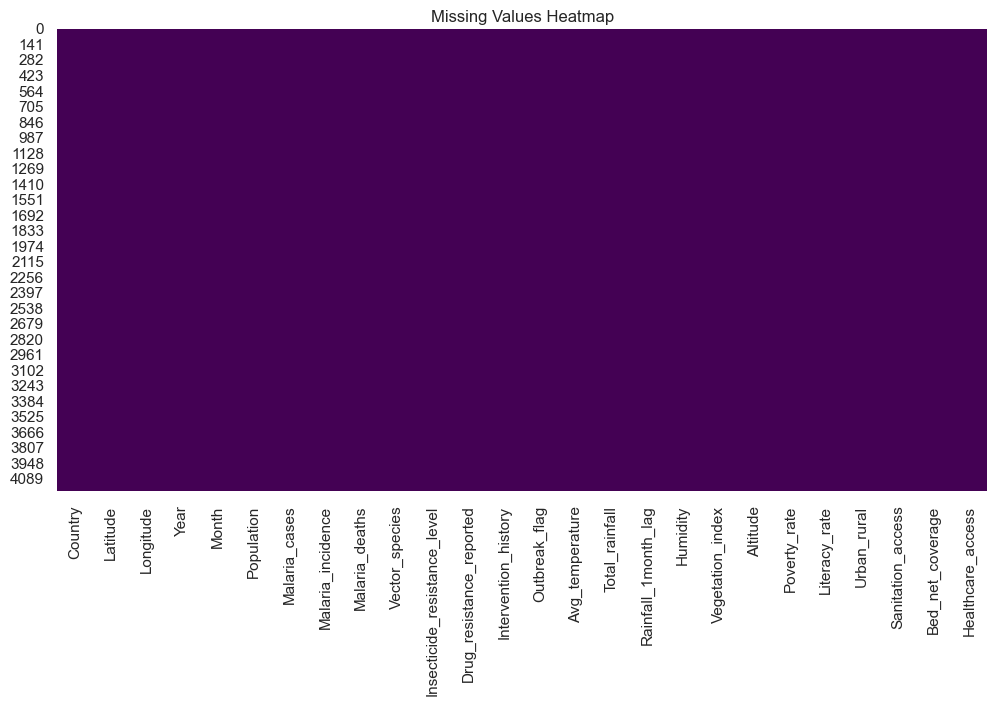

In [7]:
# Visual Heatmap of Missing Values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

---

After filling the missing values in 'Intervention_history' with 'None', we can see that from the heatmap above there are no missing values in all the columns anymore.

---

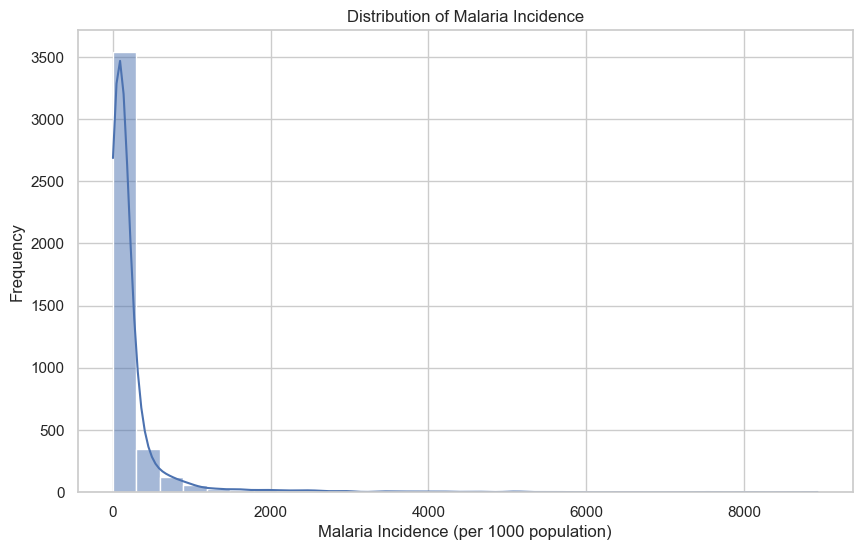

In [8]:
# Distribution Plots
plt.figure(figsize=(10,6))
sns.histplot(df['Malaria_incidence'], bins=30, kde=True)
plt.title('Distribution of Malaria Incidence')
plt.xlabel('Malaria Incidence (per 1000 population)')
plt.ylabel('Frequency')
plt.show()

---

**Shape:** The distribution is highly right-skewed.

**Meaning:**

- Most countries have low malaria incidence, mostly 0 cases per 1000 population.

- A few countries have extremely high malaria incidence, outliers above 2000 and even 4000 cases.

**Insight:**

- Malaria is concentrated in specific "hotspots".

- Log-transforming Malaria_incidence will be considered later to reduce skewness, if the column will be needed for modeling.


---

#### **Malaria Incidence Over Time**

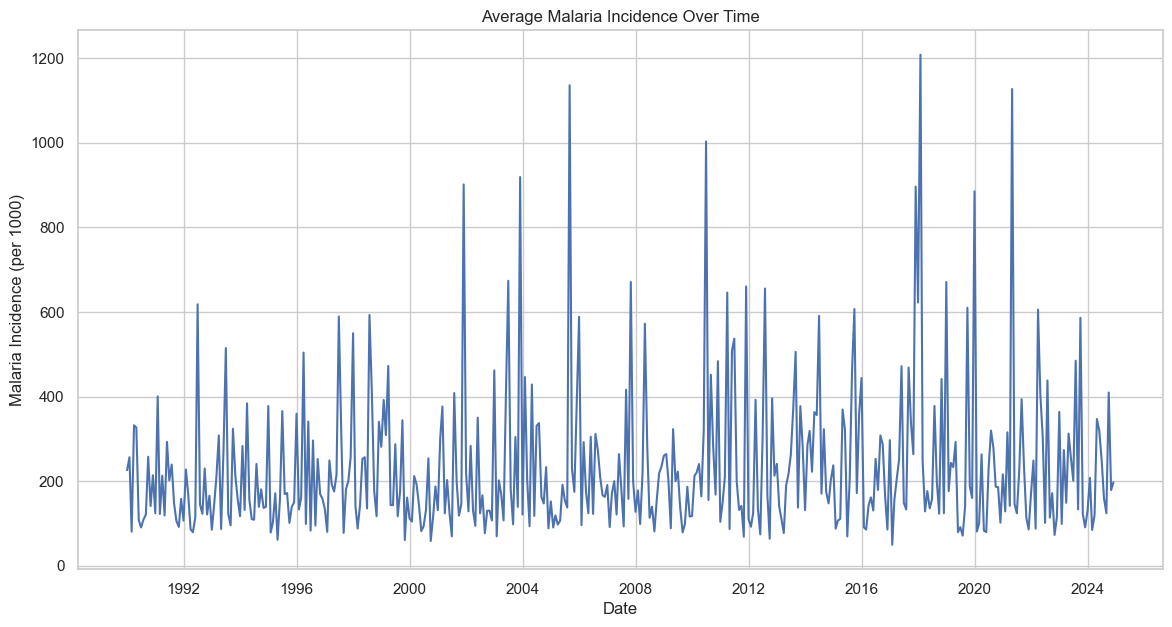

In [9]:
# Create a datetime column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')

# Plot incidence (average across all countries) over time
time_df = df.groupby('Date')['Malaria_incidence'].mean().reset_index()

plt.figure(figsize=(14,7))
sns.lineplot(data=time_df, x='Date', y='Malaria_incidence')
plt.title('Average Malaria Incidence Over Time')
plt.xlabel('Date')
plt.ylabel('Malaria Incidence (per 1000)')
plt.show()

---

**Trend:** Shows strong fluctuations across years.

- Spikes at various periods suggests that there are malaria outbreaks that happen sporadically, possibly linked to environmental, climatic or policy changes.

**Insight:**

- This shows that time features (Year, Month) could be very important predictors of malaria outbreak.

---

#### **Malaria Incidence Map**

In [10]:
# Create the base map
africa_map = folium.Map(location=[0, 20], zoom_start=4, tiles='CartoDB positron')

# Filter data for year 2024 and month 12
target_year = 2024
target_month = 12
map_df = df[(df['Year'] == target_year) & (df['Month'] == target_month)]

# Prepare heat data
heat_data = list(zip(map_df['Latitude'], map_df['Longitude'], map_df['Malaria_incidence']))

# Add heatmap layer
HeatMap(heat_data, radius=15, max_zoom=13).add_to(africa_map)

# Add custom legend
legend_html = '''
<div style="
position: fixed; 
bottom: 50px; left: 50px; width: 180px; height: 130px; 
background-color: white; 
border:2px solid grey; 
z-index:9999; 
font-size:14px;
padding: 10px;
">
<b>Malaria Incidence</b><br>
Low &nbsp; <i style="background: blue; width: 10px; height: 10px; display: inline-block;"></i><br>
Medium &nbsp; <i style="background: limegreen; width: 10px; height: 10px; display: inline-block;"></i><br>
High &nbsp; <i style="background: orange; width: 10px; height: 10px; display: inline-block;"></i><br>
Very High &nbsp; <i style="background: red; width: 10px; height: 10px; display: inline-block;"></i>
</div>
'''
africa_map.get_root().html.add_child(folium.Element(legend_html))

# Display map in Jupyter
display(africa_map)


---

**NOTE:**

The incidence map may look like it is not displaying the malaria incidence for all the 10 selected countries in Sub-Saharan Africa. This is because the map is using the latitude and logitude from the dataset, which are both generated. 

So, given the actual latitude and longitude, the code above will perfectly display the incidence map.

---

#### **Correlation Matrix**

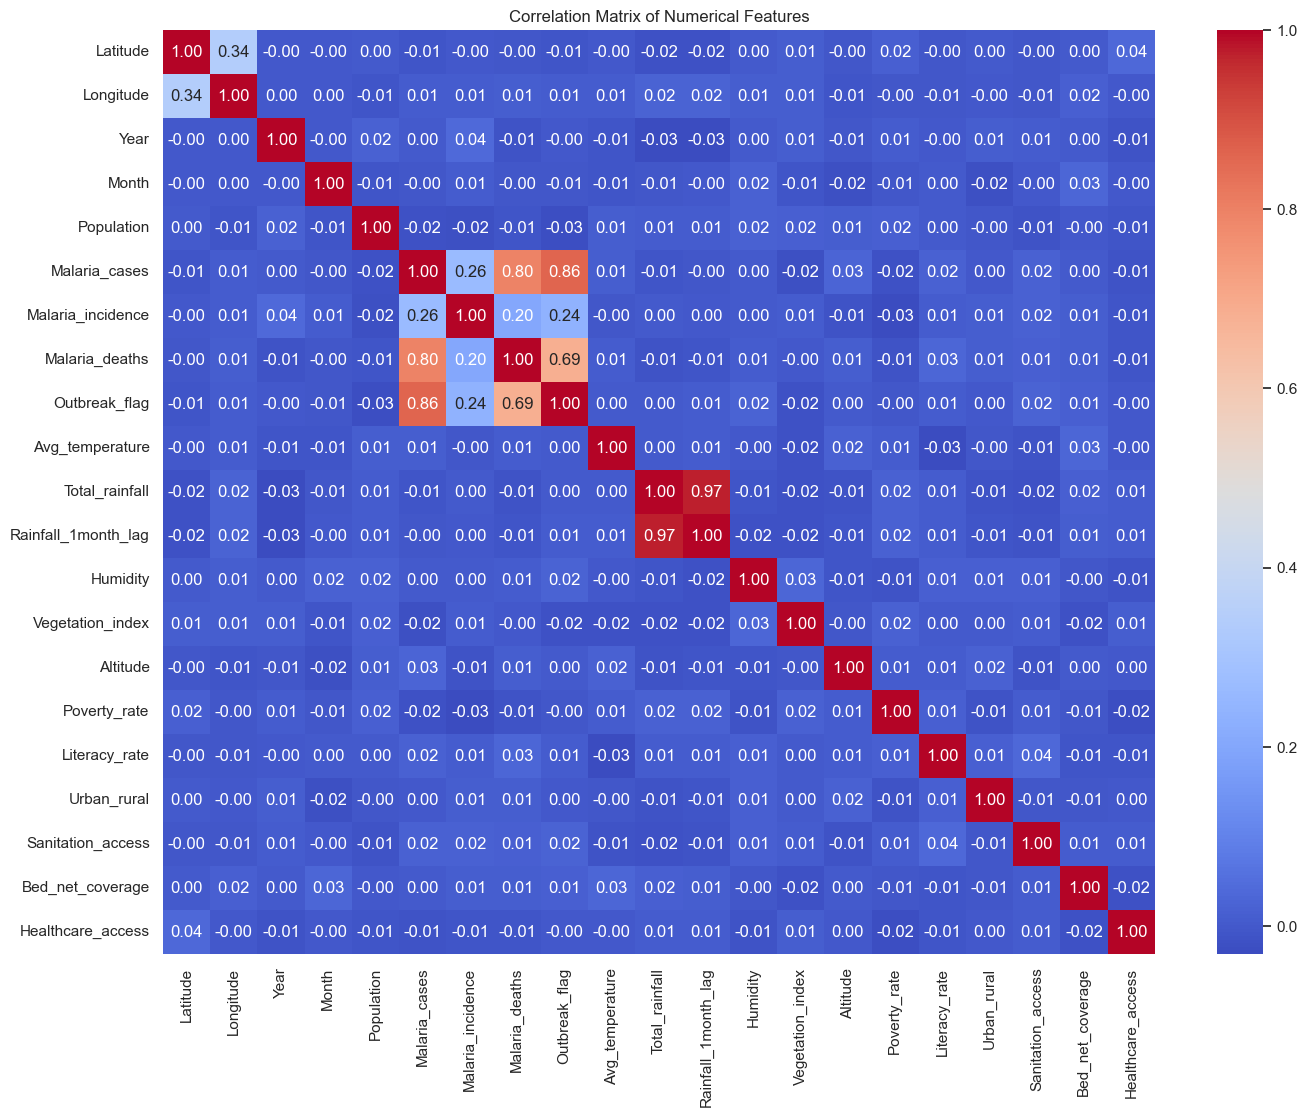

In [11]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


---

- Malaria_cases is strongly positively correlated with Malaria_incidence, Malaria_deaths, and Outbreak_flag.


- Total_rainfall and Rainfall_1month_lag have a very high correlation of 0.97 (almost identical). During the feature engineering, I will consider droping one to avoid multicollinearity.

- Humidity has high correlation with itself as expected, but very low correlation with malaria directly.

**Insight:**

- Variables like Population, Malaria_cases, Rainfall, Humidity, and Outbreak_flag will be focused on during feature selection.

---
